In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load files
cases_df = pd.read_csv('Resources/US_New_Covid_Cases.csv')
total_population_df = pd.read_csv('Resources/Population.csv')
vaccinations_df = pd.read_csv('Resources/Covid19 _Vacinations_by_State.csv')


# cases.head(2)



C:\Users\matt\.conda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (5,6,8,10,14,16,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# trim dataframe to information needed
cases_summary_df = cases_df[['State', 'Week no.', 'Total new Covid Cases']]

# drop empty rows
cases_summary_df.dropna(how='any', inplace=True)
# len(cases_summary_df)

C:\Users\matt\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
# check population objects
total_population_df.dtypes

State              object
2019 Population     int64
Code               object
dtype: object

In [5]:
# extract the vaccination columns we need to include day summary
vaccinations_summary_df = vaccinations_df[['Record Date', 'Week no.', 'State', 'State.1', 'Week no..1', 'Total vac per week']]

# extract the vaccination columns we need to include week summary
vaccinations_per_week_df = vaccinations_summary_df[['State.1', 'Week no..1', 'Total vac per week']]

# rename columns
vaccinations_per_week_df = vaccinations_per_week_df.rename(columns={'State.1':'State', 'Week no..1':'Week no.'})

# drop empty rows
vaccinations_per_week_df.dropna(how='any', inplace=True)
# len(vaccinations_per_week_df)

In [6]:
# merge the covid cases with the vaccinations based on the state and week
merge_df = pd.merge(cases_summary_df, vaccinations_per_week_df, how='inner', left_on=['State', 'Week no.'], right_on=['State', 'Week no.'] )
merge_df.head()

# we are renaming the december week numbers to indicate the starting week of our data
merge_value_reset_df = merge_df.replace({'Week no.':{53.0: 0, 52.0: -1.0, 51.0:-2.0, 50.0:-3.0, 49.0:-4.0}})
merge_value_reset_df

,State,Week no.,Total new Covid Cases,Total vac per week
0,AK,29.0,133.0,662.0
1,AK,28.0,588.0,3627.0
2,AK,27.0,304.0,5021.0
3,AK,26.0,230.0,8414.0
4,AK,25.0,239.0,6233.0
...,...,...,...,...
1667,WY,0.0,1745.0,33.0
1668,WY,-1.0,2071.0,3.0
1669,WY,-1.0,2071.0,6.0
1670,WY,-2.0,2370.0,5.0


In [7]:
# now reset the numbers because we start at -2 by adding 3 to each value
for i, row in merge_value_reset_df.iterrows():
    old_val = merge_value_reset_df.at[i, 'Week no.']
    merge_value_reset_df.at[i, "Week no."] = old_val + 3

merge_value_reset_df

,State,Week no.,Total new Covid Cases,Total vac per week
0,AK,32.0,133.0,662.0
1,AK,31.0,588.0,3627.0
2,AK,30.0,304.0,5021.0
3,AK,29.0,230.0,8414.0
4,AK,28.0,239.0,6233.0
...,...,...,...,...
1667,WY,3.0,1745.0,33.0
1668,WY,2.0,2071.0,3.0
1669,WY,2.0,2071.0,6.0
1670,WY,1.0,2370.0,5.0


In [8]:
# Input to ask which state we are wanting information for
lookup_state = input('Which State? ')

# look up this state
state_df = merge_value_reset_df.loc[(merge_df['State'] == lookup_state)]

# sort by week number ascending
state_df = state_df.sort_values(by=['Week no.'])

Which State? CA


This information is based from 12/13/2020 - 7/22/2021


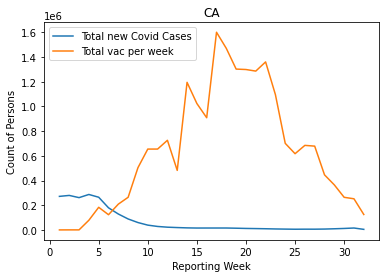

In [9]:
# plot the results of Covid cases vs when people were vaccinated
print('This information is based from 12/13/2020 - 7/22/2021')
state_df.plot(x='Week no.', y=['Total new Covid Cases', 'Total vac per week'], xlabel='Reporting Week', ylabel='Count of Persons', kind='line', title=lookup_state)
plt.show()

This information is based from 12/13/2020 - 7/22/2021


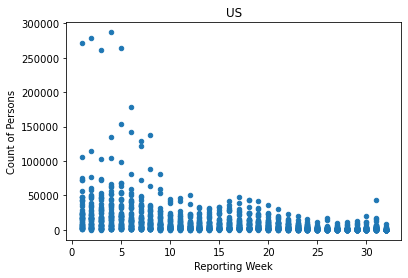

In [10]:
# plot the results of the Covid Cases across the US
print('This information is based from 12/13/2020 - 7/22/2021')
merge_value_reset_df.plot(x='Week no.', y=['Total new Covid Cases'], xlabel='Reporting Week', ylabel='Count of Persons', kind='scatter', title='US')
plt.show()

This information is based from 12/13/2020 - 7/22/2021


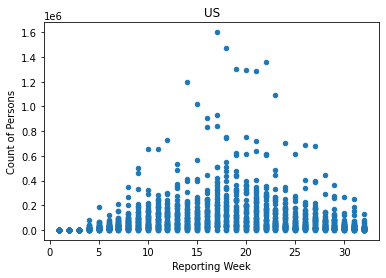

In [11]:
# plot the results of the US when people we getting vaccinated
print('This information is based from 12/13/2020 - 7/22/2021')
merge_value_reset_df.plot(x='Week no.', y=['Total vac per week'], xlabel='Reporting Week', ylabel='Count of Persons', kind='scatter', title='US')
plt.show()

In [12]:
# Ask which state to lookup
population_lookup_state = input('What State?')
# week_number = input('Rates up to which week?')

# get the population of the state requested
population_df = total_population_df.loc[(total_population_df['Code'] == population_lookup_state)]
pop = population_df['2019 Population'].values[0]

print(pop)

What State?CA
39512223


In [13]:
# 
pop_state_df = merge_value_reset_df.loc[(merge_df['State'] == lookup_state)] # & (merge_df['Week no.'] < pd.to_numeric(week_number) + 1)]
pop_state_df = pop_state_df.sort_values(by=['Week no.'])
pop_state_df['Week no.'].astype(np.int64)

# limit results up to the week requested
# pop_state_df2 = pop_state_df.loc[(pop_state_df['Week no.'] <= pd.to_numeric(week_number))]
# pop_state_df2['Week no.'].astype(np.int64)
# pop_state_df2=pop_state_df2.sort_values(by=['Week no.'], ascending=True)

# add new columns to the dataframe
pop_state_df['Running Total']=0
pop_state_df['Running Total'].astype(np.int64)
pop_state_df['Percentage Vaccinated']=0
pop_state_df['Percentage Vaccinated'].astype(np.float)
# pop_state_df2.astype({'Percentage Vaccinated':'float'})
total = 0

# sum up the totals for each week to a running total
# show what percentage of the population had been vaccinated by that point
for i, row in pop_state_df.iterrows():
    week_val = pop_state_df.at[i, 'Total vac per week']
    pd.to_numeric(week_val)
    total = total + week_val
    pop_state_df.at[i, 'Running Total'] = total
    percentage = (total / pop) * 100
    pop_state_df.at[i,'Percentage Vaccinated'] = percentage
pop_state_df

C:\Users\matt\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


,State,Week no.,Total new Covid Cases,Total vac per week,Running Total,Percentage Vaccinated
159,CA,1.0,271680.0,110.0,110,0
158,CA,2.0,279419.0,419.0,529,0
157,CA,3.0,261470.0,367.0,896,0
156,CA,4.0,287110.0,78445.0,79341,0
155,CA,5.0,264706.0,183248.0,262589,0
154,CA,6.0,179199.0,123202.0,385791,0
153,CA,7.0,128861.0,208842.0,594633,1
152,CA,8.0,88701.0,264374.0,859007,2
151,CA,9.0,59763.0,504276.0,1363283,3
150,CA,10.0,38884.0,654633.0,2017916,5


Population vaccinated by each week


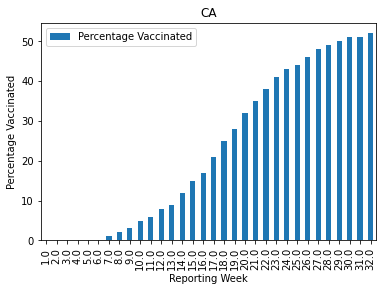

In [14]:
print('Population vaccinated by each week')
pop_state_df.plot(x='Week no.', y=['Percentage Vaccinated'], xlabel='Reporting Week', ylabel='Percentage Vaccinated', kind='bar', title=lookup_state)
plt.show()

In [15]:

# Rename columes to eliminate spaces
merge_value_reset_df.rename(columns = {'Week no.':'WEEK', 'Total new Covid Cases':'Total_new_Covid_Cases',
                              'Total vac per week':'Total_vac_per_week'}, inplace = True)




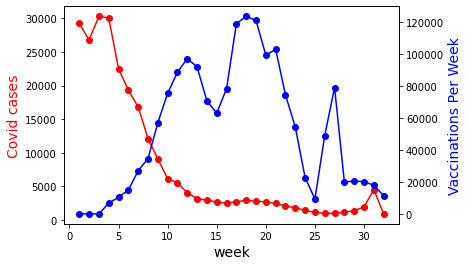

In [16]:

merge_value_reset_df_AL = merge_value_reset_df[merge_value_reset_df.State=="AL"]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(merge_value_reset_df_AL.WEEK, merge_value_reset_df_AL.Total_new_Covid_Cases, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("lifeExp",color="red",fontsize=14)
# set x-axis label
ax.set_xlabel("week",fontsize=14)
# set y-axis label
ax.set_ylabel("Covid cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(merge_value_reset_df_AL.WEEK, merge_value_reset_df_AL.Total_vac_per_week,color="blue",marker="o")
ax2.set_ylabel("Vaccinations Per Week",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


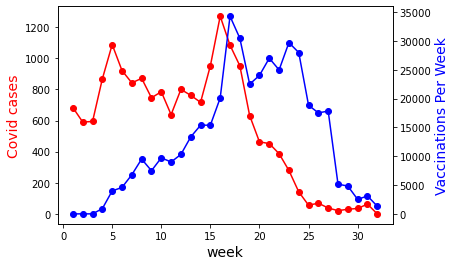

In [17]:
#look at the least vaccinated states(AL, MS, AR, ID, LA)

Merge_VT = merge_value_reset_df[merge_value_reset_df.State=="VT"]

fig,ax = plt.subplots()
# make a plot
ax.plot(Merge_VT.WEEK, Merge_VT.Total_new_Covid_Cases, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("lifeExp",color="red",fontsize=14)
# set x-axis label
ax.set_xlabel("week",fontsize=14)
# set y-axis label
ax.set_ylabel("Covid cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Merge_VT.WEEK, Merge_VT.Total_vac_per_week,color="blue",marker="o")
ax2.set_ylabel("Vaccinations Per Week",color="blue",fontsize=14)
plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [18]:
LEAST_STATES = ["AR","AL","MS","ID","LA"]


Merge_LEAST = merge_value_reset_df[merge_value_reset_df.State.isin(LEAST_STATES)]

Merge_LEAST_grouped = Merge_LEAST.groupby(["WEEK"], as_index=False).sum()

Merge_LEAST_grouped

,WEEK,Total_new_Covid_Cases,Total_vac_per_week
0,1.0,86813.0,151.0
1,2.0,82558.0,332.0
2,3.0,84155.0,233.0
3,4.0,94462.0,31066.0
4,5.0,84372.0,63299.0
5,6.0,68990.0,52137.0
6,7.0,59890.0,104420.0
7,8.0,48501.0,217458.0
8,9.0,32867.0,269688.0
9,10.0,20293.0,185207.0


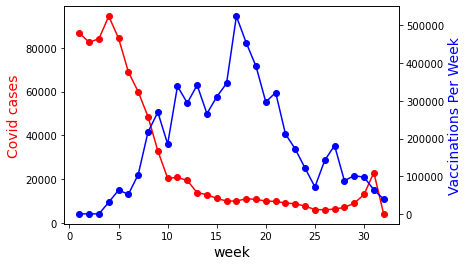

In [19]:
fig,ax = plt.subplots()
# make a plot
ax.plot(Merge_LEAST_grouped.WEEK, Merge_LEAST_grouped.Total_new_Covid_Cases, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("lifeExp",color="red",fontsize=14)
# set x-axis label
ax.set_xlabel("week",fontsize=14)
# set y-axis label
ax.set_ylabel("Covid cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Merge_LEAST_grouped.WEEK, Merge_LEAST_grouped.Total_vac_per_week,color="blue",marker="o")
ax2.set_ylabel("Vaccinations Per Week",color="blue",fontsize=14)
plt.show()

In [20]:
MOST_STATES = ["RI","CT","ME","MA","VT"]


Merge_MOST = merge_value_reset_df[merge_value_reset_df.State.isin(MOST_STATES)]

Merge_MOST_grouped = Merge_MOST.groupby(["WEEK"], as_index=False).sum()

Merge_MOST_grouped

,WEEK,Total_new_Covid_Cases,Total_vac_per_week
0,1.0,61853.0,22.0
1,2.0,54940.0,71.0
2,3.0,56295.0,98.0
3,4.0,65975.0,25694.0
4,5.0,73762.0,52063.0
5,6.0,55881.0,59556.0
6,7.0,48777.0,112653.0
7,8.0,35298.0,112472.0
8,9.0,30982.0,160891.0
9,10.0,22065.0,188511.0


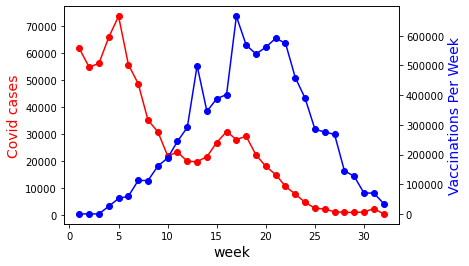

In [21]:
fig,ax = plt.subplots()
# make a plot
ax.plot(Merge_MOST_grouped.WEEK, Merge_MOST_grouped.Total_new_Covid_Cases, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("lifeExp",color="red",fontsize=14)
# set x-axis label
ax.set_xlabel("week",fontsize=14)
# set y-axis label
ax.set_ylabel("Covid cases",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(Merge_MOST_grouped.WEEK, Merge_MOST_grouped.Total_vac_per_week,color="blue",marker="o")
ax2.set_ylabel("Vaccinations Per Week",color="blue",fontsize=14)
plt.show()